In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data
link: https://www.kaggle.com/datasets/danmcinerney/mma-differentials-and-elo

In [66]:
data = pd.read_csv('UFC_Data/masterdataframe.csv')

# Remove every fight before UFC 28 (17/11/2000) and all collumns after the 60th
# This is because UFC 28 was the first to use the unified rules of MMA
# The collumns after the 60th are differentials and averages of the first 60
data = data.iloc[464:, 0:60]

# Set date to datetime format
data.date = pd.to_datetime(data.date)

print(data.columns)

data.tail()

Index(['date', 'fight_url', 'event_url', 'result', 'fighter', 'opponent',
       'division', 'stance', 'dob', 'method', 'total_comp_time', 'round',
       'time', 'fighter_url', 'opponent_url', 'referee', 'time_format',
       'reach', 'height', 'age', 'knockdowns', 'sub_attempts', 'reversals',
       'control', 'takedowns_landed', 'takedowns_attempts',
       'sig_strikes_landed', 'sig_strikes_attempts', 'total_strikes_landed',
       'total_strikes_attempts', 'head_strikes_landed',
       'head_strikes_attempts', 'body_strikes_landed', 'body_strikes_attempts',
       'leg_strikes_landed', 'leg_strikes_attempts', 'distance_strikes_landed',
       'distance_strikes_attempts', 'clinch_strikes_landed',
       'clinch_strikes_attempts', 'ground_strikes_landed',
       'ground_strikes_attempts', 'takedowns_accuracy', 'sig_strikes_accuracy',
       'total_strikes_accuracy', 'head_strikes_accuracy',
       'body_strikes_accuracy', 'leg_strikes_accuracy',
       'distance_strikes_accuracy', '

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,ground_strikes_accuracy,takedowns_def,sig_strikes_def,total_strikes_def,head_strikes_def,body_strikes_def,leg_strikes_def,distance_strikes_def,clinch_strikes_def,ground_strikes_def
13317,2022-06-25,http://ufcstats.com/fight-details/c57c8e22a3e8...,http://ufcstats.com/event-details/eb42d4febfaf...,1,Josh Parisian,Alan Baudot,Heavyweight,Orthodox,1989-06-28,KO/TKO,...,72.000000,100.000000,34.666667,31.707317,42.372881,11.111111,0.000000,51.063830,0.0,11.764706
13318,2022-06-25,http://ufcstats.com/fight-details/3c98739eb42f...,http://ufcstats.com/event-details/eb42d4febfaf...,0,Neil Magny,Shavkat Rakhmonov,Welterweight,Orthodox,1987-08-03,SUB,...,50.000000,0.000000,47.222222,29.113924,50.000000,0.000000,100.000000,50.000000,100.0,46.153846
13319,2022-06-25,http://ufcstats.com/fight-details/3c98739eb42f...,http://ufcstats.com/event-details/eb42d4febfaf...,1,Shavkat Rakhmonov,Neil Magny,Welterweight,Orthodox,1994-10-23,SUB,...,53.846154,100.000000,50.000000,40.000000,62.500000,0.000000,25.000000,50.000000,100.0,50.000000
13320,2022-06-25,http://ufcstats.com/fight-details/1f5f59924b59...,http://ufcstats.com/event-details/eb42d4febfaf...,0,Arman Tsarukyan,Mateusz Gamrot,Lightweight,Orthodox,1996-10-11,U-DEC,...,66.666667,71.428571,41.304348,34.939759,43.801653,25.000000,20.000000,43.410853,20.0,0.000000
13321,2022-06-25,http://ufcstats.com/fight-details/1f5f59924b59...,http://ufcstats.com/event-details/eb42d4febfaf...,1,Mateusz Gamrot,Arman Tsarukyan,Lightweight,Southpaw,1990-12-11,U-DEC,...,100.000000,87.500000,61.538462,58.333333,76.373626,18.750000,23.529412,62.553191,50.0,33.333333


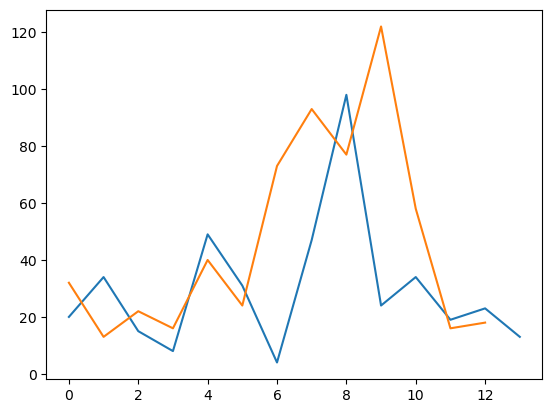

In [85]:
# Compare two fighters
fighter1 = 'Conor McGregor'
fighter2 = 'Khabib Nurmagomedov'
column = 'head_strikes_landed'

mcgregor_data = data.loc[data['fighter'] == fighter1][column].reset_index(drop=True)
khabib_data = data.loc[data['fighter'] == fighter2][column].reset_index(drop=True)

plt.plot(mcgregor_data)
plt.plot(khabib_data)

In [64]:
unique_fighters = data['fighter'].unique()
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_columns + ['fighter'])
# Create a dataframe with average stats of fighters
data[numerical_columns + ['fighter']].groupby('fighter').mean()

['result', 'total_comp_time', 'round', 'reach', 'height', 'age', 'knockdowns', 'sub_attempts', 'reversals', 'control', 'takedowns_landed', 'takedowns_attempts', 'sig_strikes_landed', 'sig_strikes_attempts', 'total_strikes_landed', 'total_strikes_attempts', 'head_strikes_landed', 'head_strikes_attempts', 'body_strikes_landed', 'body_strikes_attempts', 'leg_strikes_landed', 'leg_strikes_attempts', 'distance_strikes_landed', 'distance_strikes_attempts', 'clinch_strikes_landed', 'clinch_strikes_attempts', 'ground_strikes_landed', 'ground_strikes_attempts', 'takedowns_accuracy', 'sig_strikes_accuracy', 'total_strikes_accuracy', 'head_strikes_accuracy', 'body_strikes_accuracy', 'leg_strikes_accuracy', 'distance_strikes_accuracy', 'clinch_strikes_accuracy', 'ground_strikes_accuracy', 'takedowns_def', 'sig_strikes_def', 'total_strikes_def', 'head_strikes_def', 'body_strikes_def', 'leg_strikes_def', 'distance_strikes_def', 'clinch_strikes_def', 'ground_strikes_def', 'fighter']


,result,total_comp_time,round,reach,height,age,knockdowns,sub_attempts,reversals,control,...,ground_strikes_accuracy,takedowns_def,sig_strikes_def,total_strikes_def,head_strikes_def,body_strikes_def,leg_strikes_def,distance_strikes_def,clinch_strikes_def,ground_strikes_def
fighter,,,,,,,,,,,,,,,,,,,,,
AJ Dobson,0.000,900.000000,3.000000,76.0,73.0,30.0,0.000,0.000000,0.000000,27.000000,...,100.000000,62.500000,37.500000,28.235294,40.677966,0.000000,0.000000,49.122807,42.857143,26.562500
AJ Fletcher,0.000,900.000000,3.000000,67.0,70.0,25.0,0.000,2.000000,2.000000,342.000000,...,80.000000,0.000000,51.219512,44.329897,52.238806,50.000000,33.333333,58.823529,33.333333,39.285714
Aalon Cruz,0.000,92.500000,1.000000,78.0,72.0,32.0,0.000,0.000000,0.000000,8.000000,...,0.000000,100.000000,29.802956,24.679943,29.568913,50.000000,0.000000,39.583333,10.000000,27.457265
Aaron Brink,0.000,55.000000,1.000000,NaN,75.0,47.0,0.000,0.000000,0.000000,4.000000,...,0.000000,0.000000,50.000000,50.000000,66.666667,100.000000,0.000000,0.000000,100.000000,100.000000
Aaron Phillips,0.000,749.666667,2.666667,71.0,69.0,32.0,0.000,0.333333,0.333333,24.333333,...,46.212121,44.444444,39.381264,28.467569,42.598270,27.466977,26.190476,57.096774,19.444444,35.033390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhang Lipeng,0.500,900.000000,3.000000,71.0,71.0,32.0,0.000,0.750000,0.000000,267.250000,...,57.738095,82.070707,54.809029,39.128939,65.091506,54.924242,26.274672,65.648400,26.743730,55.140693
Zhang Tiequan,0.250,545.000000,2.250000,69.0,68.0,43.0,0.000,1.250000,0.000000,30.500000,...,0.000000,83.333333,51.290547,34.519315,56.950758,63.392857,50.000000,61.889839,75.000000,64.457071
Zhang Weili,0.750,698.625000,2.625000,63.0,64.0,32.0,0.250,0.250000,0.125000,117.375000,...,57.636583,87.500000,51.523989,49.450463,68.939090,34.785241,30.818632,66.220052,20.000000,70.384615


In [56]:
data._get_numeric_data()

,result,total_comp_time,round,reach,height,age,knockdowns,sub_attempts,reversals,control,...,ground_strikes_accuracy,takedowns_def,sig_strikes_def,total_strikes_def,head_strikes_def,body_strikes_def,leg_strikes_def,distance_strikes_def,clinch_strikes_def,ground_strikes_def
464,0,600,2,68.0,71.0,47.0,0,1,0,0,...,0.000000,0.000000,44.444444,9.859155,44.444444,100.000000,100.000000,0.000000,100.0,50.000000
465,1,600,2,NaN,68.0,NaN,0,0,0,587,...,50.000000,100.000000,33.333333,6.451613,100.000000,0.000000,100.000000,33.333333,100.0,100.000000
466,0,600,2,NaN,74.0,NaN,0,1,0,0,...,100.000000,50.000000,52.631579,12.820513,58.823529,0.000000,100.000000,100.000000,0.0,52.941176
467,1,600,2,NaN,69.0,48.0,0,3,0,564,...,47.058824,100.000000,42.857143,9.523810,40.000000,50.000000,100.000000,100.000000,50.0,0.000000
468,0,15,1,NaN,72.0,NaN,0,0,0,0,...,0.000000,100.000000,66.666667,66.666667,66.666667,100.000000,100.000000,66.666667,100.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,1,484,2,79.0,76.0,33.0,0,0,0,189,...,72.000000,100.000000,34.666667,31.707317,42.372881,11.111111,0.000000,51.063830,0.0,11.764706
13318,0,598,2,80.0,75.0,34.0,0,0,0,7,...,50.000000,0.000000,47.222222,29.113924,50.000000,0.000000,100.000000,50.000000,100.0,46.153846
13319,1,598,2,77.0,73.0,27.0,0,1,0,546,...,53.846154,100.000000,50.000000,40.000000,62.500000,0.000000,25.000000,50.000000,100.0,50.000000
13320,0,1500,5,72.0,67.0,25.0,1,0,0,99,...,66.666667,71.428571,41.304348,34.939759,43.801653,25.000000,20.000000,43.410853,20.0,0.000000
